***EN ESTE NOTEBOOK VAMOS A IMPLEMENTAR UN MODELO QUE SEGÚN UNA DESCRIPCIÓN DADA POR EL USUARIO, PUEDA PREDECIR EL MÚSCULO QUE SE VA A ENTRENAR***

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt


df_gym = pd.read_csv('../../dataset/megaGymDataset_clean.csv')

In [13]:
df_nuevo = df_gym.drop(columns={'Rating' , 'Equipment' , 'Level' , 'Type'})

- Antes de entrenar a nuestro modelo vamos a preprocesar los datos e intentar balancear los ejemplos que encontramos para cada *'BodtPart'* ya que encontramos pocas muestras de partes como , nuestro objetivo es tener al menos 100 muestras de cada clase, aumentaremos las muestras de : 

    - Lower Back

    - Glutes


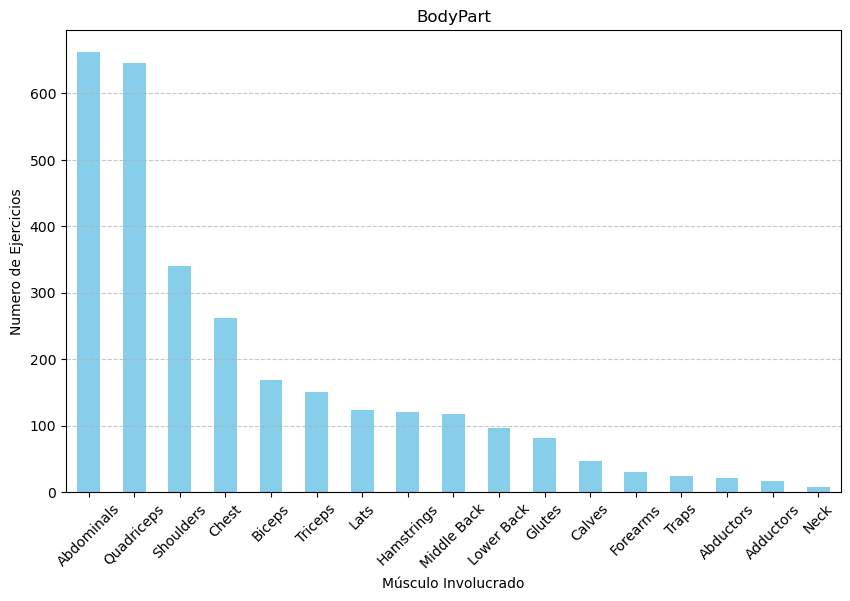

In [14]:
conteo_tipo = df_nuevo['BodyPart'].value_counts()


plt.figure(figsize=(10, 6))  
conteo_tipo.plot(kind='bar', color='skyblue') 
plt.title('BodyPart')  
plt.xlabel('Músculo Involucrado') 
plt.ylabel('Numero de Ejercicios') 
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 

In [15]:
df_nuevo.head(20)

,Title,Desc,BodyPart
0,Partner plank band row,The partner plank band row is an abdominal exe...,Abdominals
1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Abdominals
2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Abdominals
3,Banded crunch,The banded crunch is an exercise targeting the...,Abdominals
4,Crunch,The crunch is a popular core exercise targetin...,Abdominals
5,Decline band press sit-up,The decline band press sit-up is a weighted co...,Abdominals
6,FYR2 Banded Frog Pump,No Desc,Abdominals
7,Band low-to-high twist,The band low-to-high twist is a core exercise ...,Abdominals
8,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Abdominals
9,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Abdominals


- Añadiendo 10 muestras para *'Lower Back'*

In [16]:
# Nuevas filas para Lower Back
nuevas_filas_lower_back = [
    {"Desc": "The lower back extension is an exercise targeting the erector spinae muscles of the lower back. It involves lying face down on the ground and lifting the upper body by extending the lower back. This exercise helps strengthen the muscles of the lower back and can improve spinal stability and posture.", "BodyPart": "Lower Back"},
    {"Desc": "The superman exercise is a bodyweight movement that targets the lower back, glutes, and upper back muscles. It involves lying face down on the ground with arms and legs extended, then simultaneously lifting the arms and legs off the ground. This exercise helps strengthen the muscles of the lower back and improve overall core stability.", "BodyPart": "Lower Back"},
    {"Desc": "The bird dog exercise is a core-stabilizing movement that targets the lower back, abdominals, and glutes. It involves starting on hands and knees, then extending one arm and the opposite leg while keeping the spine stable. This exercise helps improve balance, coordination, and spinal alignment.", "BodyPart": "Lower Back"},
    {"Desc": "The cat-cow stretch is a gentle yoga sequence that targets the entire spine, including the lower back. It involves transitioning between arching the back upwards (cat pose) and arching it downwards (cow pose) while on hands and knees. This stretch helps improve spinal flexibility and alleviate tension in the lower back.", "BodyPart": "Lower Back"},
    {"Desc": "The seated lower back rotational stretch is a simple stretch that targets the muscles of the lower back and spine. It involves sitting on the ground with legs extended, then twisting the torso to one side while reaching the opposite arm across the body. This stretch helps improve spinal mobility and alleviate stiffness in the lower back.", "BodyPart": "Lower Back"},
    {"Desc": "The lying twist stretch is a yoga pose that targets the muscles of the lower back, spine, and hips. It involves lying on the back with arms extended out to the sides, then twisting the legs to one side while keeping the upper body stable. This stretch helps release tension in the lower back and improve spinal flexibility.", "BodyPart": "Lower Back"},
    {"Desc": "The standing lower back stretch is a simple stretch that targets the muscles of the lower back and hamstrings. It involves standing with feet hip-width apart, then bending forward at the hips and reaching towards the toes while keeping the back straight. This stretch helps improve flexibility in the lower back and hamstrings.", "BodyPart": "Lower Back"},
    {"Desc": "The seated lower back stretch is a gentle stretch that targets the muscles of the lower back and hips. It involves sitting on the ground with legs extended, then bending forward at the hips and reaching towards the toes. This stretch helps alleviate tension and tightness in the lower back and improve flexibility.", "BodyPart": "Lower Back"},
    {"Desc": "The kneeling lower back stretch is a yoga pose that targets the muscles of the lower back, hips, and thighs. It involves kneeling on the ground with knees hip-width apart, then sitting back on the heels while reaching the arms forward and lowering the chest towards the ground. This stretch helps release tension in the lower back and improve hip flexibility.", "BodyPart": "Lower Back"},
    {"Desc": "The child's pose stretch is a yoga pose that stretches the entire back, including the lower back, spine, and shoulders. It involves sitting back on the heels with knees wide apart, then reaching the arms forward and lowering the chest towards the ground while resting the forehead on the floor. This stretch helps release tension in the lower back and promote relaxation.", "BodyPart": "Lower Back"}
]

# Convertir las nuevas filas en un DataFrame
nuevos_datos = pd.DataFrame(nuevas_filas_lower_back)

# Concatenar el nuevo DataFrame con el DataFrame existente
df_nuevo = pd.concat([df_nuevo, nuevos_datos], ignore_index=True)

- Añadiendo 20 muestras para *'Glutes'*

In [17]:
# Nuevas filas para Glutes
nuevas_filas_glutes = [
    {"Desc": "The glute kickback is an isolation exercise that targets the glutes. It involves attaching an ankle cuff to a cable machine, then standing facing the machine and kicking the leg back against resistance while keeping the torso stable. This exercise helps shape and strengthen the glutes.", "BodyPart": "Glutes"},
    {"Desc": "The glute-hamstring raise is an advanced bodyweight exercise that targets the glutes, hamstrings, and lower back. It involves kneeling on a glute-ham developer machine with the feet anchored, then lowering the torso towards the ground while keeping the back straight, and then lifting back up to the starting position using the glutes and hamstrings. This exercise helps improve posterior chain strength and stability.", "BodyPart": "Glutes"},
    {"Desc": "The hip thrust is a lower body exercise that targets the glutes, hamstrings, and quadriceps. It involves sitting on the ground with a loaded barbell across the hips, then driving through the heels to lift the hips towards the ceiling. This exercise helps strengthen the glutes and improve hip extension.", "BodyPart": "Glutes"},
    {"Desc": "The single-leg glute bridge is a variation of the glute bridge exercise that targets one glute at a time. It involves lying on the back with one knee bent and the other leg extended towards the ceiling, then lifting the hips off the ground while squeezing the glutes. This exercise helps improve unilateral strength and balance in the glutes.", "BodyPart": "Glutes"},
    {"Desc": "The lateral band walk is a resistance exercise that targets the glutes, hips, and outer thighs. It involves placing a resistance band around the ankles or thighs, then stepping sideways while maintaining tension on the band. This exercise helps strengthen the muscles responsible for hip abduction and improve hip stability.", "BodyPart": "Glutes"},
    {"Desc": "The sumo deadlift is a compound exercise that targets the glutes, hamstrings, quadriceps, and lower back. It involves standing with a wide stance and gripping a barbell with hands inside the knees, then lifting the weight by extending the hips and knees. This exercise helps develop overall lower body strength and power.", "BodyPart": "Glutes"},
    {"Desc": "The cable pull-through is a hip-dominant exercise that targets the glutes and hamstrings. It involves attaching a rope handle to the low pulley of a cable machine, then bending at the hips and driving them forward to pull the weight between the legs while keeping the back straight. This exercise helps improve hip hinge mechanics and strengthen the posterior chain.", "BodyPart": "Glutes"},
    {"Desc": "The Bulgarian split squat is a single-leg exercise that targets the glutes, quadriceps, and hamstrings. It involves standing in a split stance with one foot elevated behind on a bench or step, then lowering the back knee towards the ground while keeping the front knee in line with the toes. This exercise helps improve balance, stability, and unilateral leg strength.", "BodyPart": "Glutes"},
    {"Desc": "The lying abduction exercise is an isolation exercise that targets the glutes and outer thighs. It involves lying on one side with the bottom leg bent for support, then lifting the top leg towards the ceiling while keeping it straight. This exercise helps strengthen the muscles responsible for hip abduction and improve hip stability.", "BodyPart": "Glutes"},
    {"Desc": "The glute squeeze plank is a variation of the plank exercise that targets the glutes and core. It involves holding a plank position with feet together and squeezing the glutes while maintaining a straight line from head to heels. This exercise helps improve glute activation and core stability.", "BodyPart": "Glutes"},
    {"Desc": "The hip thrust is a lower body exercise that targets the glutes, hamstrings, and quadriceps. It involves sitting on the ground with a loaded barbell across the hips, then driving through the heels to lift the hips towards the ceiling. This exercise helps strengthen the glutes and improve hip extension.", "BodyPart": "Glutes"},
    {"Desc": "The Bulgarian split squat is a single-leg exercise that targets the glutes, quadriceps, and hamstrings. It involves standing in a split stance with one foot elevated behind on a bench or step, then lowering the back knee towards the ground while keeping the front knee in line with the toes. This exercise helps improve balance, stability, and unilateral leg strength.", "BodyPart": "Glutes"},
    {"Desc": "The sumo deadlift is a compound exercise that targets the glutes, hamstrings, quadriceps, and lower back. It involves standing with a wide stance and gripping a barbell with hands inside the knees, then lifting the weight by extending the hips and knees. This exercise helps develop overall lower body strength and power.", "BodyPart": "Glutes"},
    {"Desc": "The glute bridge is an exercise that targets the glutes and hamstrings. It involves lying on the back with knees bent and feet flat on the ground, then lifting the hips towards the ceiling while squeezing the glutes at the top of the movement. This exercise helps improve hip stability, strength, and posture.", "BodyPart": "Glutes"},
    {"Desc": "The walking lunge is a compound exercise that targets the glutes, quadriceps, hamstrings, and calves. It involves stepping forward with one leg and lowering the body until both knees are bent at 90-degree angles, then pushing back to the starting position and repeating on the other side. This exercise helps improve lower body strength, balance, and coordination.", "BodyPart": "Glutes"},
    {"Desc": "The hip abductor machine is a resistance exercise that targets the glutes and outer thighs. It involves sitting on a machine with legs spread apart and pushing against resistance pads to bring the legs together. This exercise helps strengthen the muscles responsible for hip abduction and improve hip stability.", "BodyPart": "Glutes"},
    {"Desc": "The standing cable kickback is an isolation exercise that targets the glutes. It involves attaching an ankle cuff to a low cable pulley, then standing facing the machine and kicking the leg back against resistance while keeping the torso upright. This exercise helps strengthen and shape the glutes.", "BodyPart": "Glutes"},
    {"Desc": "The Romanian deadlift is a compound exercise that targets the glutes, hamstrings, and lower back. It involves holding a barbell with hands shoulder-width apart, then hinging at the hips to lower the weight towards the ground while keeping the back straight. This exercise helps improve hip hinge mechanics and posterior chain strength.", "BodyPart": "Glutes"},
    {"Desc": "The seated hip abduction machine is an isolation exercise that targets the glutes and outer thighs. It involves sitting on a machine with legs pressed against resistance pads and pushing the legs outwards against resistance. This exercise helps strengthen the muscles responsible for hip abduction and improve hip stability.", "BodyPart": "Glutes"},
    {"Desc": "The glute-ham raise is an advanced bodyweight exercise that targets the glutes, hamstrings, and lower back. It involves kneeling on a glute-ham developer machine with the feet anchored, then lowering the torso towards the ground while keeping the back straight, and then lifting back up to the starting position using the glutes and hamstrings. This exercise helps improve posterior chain strength and stability.", "BodyPart": "Glutes"}
]

    

# Convertir las nuevas filas en un DataFrame
nuevos_datos_glutes = pd.DataFrame(nuevas_filas_glutes)

# Concatenar el nuevo DataFrame con el DataFrame existente
df_nuevo = pd.concat([df_nuevo, nuevos_datos_glutes], ignore_index=True)

In [18]:
# Encontrar índices de las filas que se refieren a 'traps'
datos_borrar_forearms = df_nuevo[df_nuevo['BodyPart'] == 'Forearms'].index
datos_borrar_traps = df_nuevo[df_nuevo['BodyPart'] == 'Traps'].index
datos_borrar_abductor = df_nuevo[df_nuevo['BodyPart'] == 'Abductors'].index
datos_borrar_adductor= df_nuevo[df_nuevo['BodyPart'] == 'Adductors'].index
datos_borrar_neck = df_nuevo[df_nuevo['BodyPart'] == 'Neck'].index
datos_borrar_calves = df_nuevo[df_nuevo['BodyPart'] == 'Calves'].index

# Crear una lista de todos los índices a eliminar
indices_a_borrar = list(datos_borrar_calves) + list(datos_borrar_forearms) + list(datos_borrar_traps) + list(datos_borrar_abductor) + list(datos_borrar_adductor) + list(datos_borrar_neck)

# Eliminar las filas usando drop
df_nuevo.drop(indices_a_borrar, inplace=True)


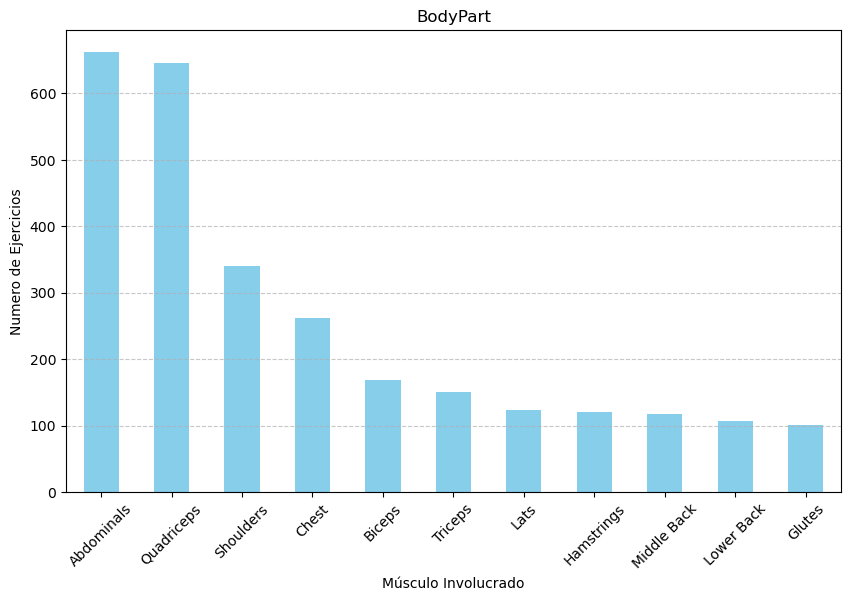

In [19]:
conteo_tipo = df_nuevo['BodyPart'].value_counts()


plt.figure(figsize=(10, 6))  
conteo_tipo.plot(kind='bar', color='skyblue') 
plt.title('BodyPart')  
plt.xlabel('Músculo Involucrado') 
plt.ylabel('Numero de Ejercicios') 
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 

In [20]:
#df_nuevo.to_csv('../dataset/megaGymDataset_predecir.csv' , index=False)

- De esta forma hemos aumentado algunas de las muestras de nuestro Dataset y eliminado en lo que mi opinión son músculos de menor tamaño y "menos importantes" y exportado el dataset para entrenar nuestro modelo de regresión

In [21]:
# Cargar el dataset actualizado
df = pd.read_csv("../../dataset/megaGymDataset_predecir.csv")

# Definir el número deseado de muestras por BodyPart
num_muestras_por_clase = 100

# Crear un DataFrame vacío para almacenar las muestras balanceadas
df_balanceado = pd.DataFrame(columns=df.columns)

# Iterar sobre cada BodyPart y submuestrear las muestras
for bodypart in df['BodyPart'].unique():
    muestras_bodypart = df[df['BodyPart'] == bodypart].sample(num_muestras_por_clase, random_state=42)
    df_balanceado = pd.concat([df_balanceado, muestras_bodypart])

# Reordenar el DataFrame balanceado
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

In [22]:
df_balanceado.shape

(1100, 3)

In [23]:
df_balanceado[df_balanceado['Desc'] == 'No Desc'].value_counts()

Title                                           Desc     BodyPart   
30 Arms BFR Close-Grip Push-Up                  No Desc  Triceps        1
Jordan Shallow Foam Roller Thoracic Extension   No Desc  Shoulders      1
Lying Close-Grip Barbell Triceps Press To Chin  No Desc  Triceps        1
Linear Acceleration Wall Drill                  No Desc  Hamstrings     1
Linear 3-Part Start Technique                   No Desc  Hamstrings     1
                                                                       ..
FYR2 Triceps Push-Up                            No Desc  Triceps        1
FYR2 Sprawl Over Kettlebell                     No Desc  Triceps        1
FYR2 Single-Dumbbell Push-Up                    No Desc  Chest          1
FYR2 Single-Dumbbell Biceps Curl                No Desc  Biceps         1
Yates Row Reverse Grip                          No Desc  Middle Back    1
Name: count, Length: 543, dtype: int64

In [24]:
datos_borrar_no_desc = df_balanceado[df_balanceado['Desc'] == 'No Desc'].index
# Crear una lista de todos los índices a eliminar
indices_a_borrar = list(datos_borrar_no_desc)
# Eliminar las filas usando drop
df_balanceado.drop(indices_a_borrar, inplace=True)


In [25]:
df_balanceado.shape

(557, 3)

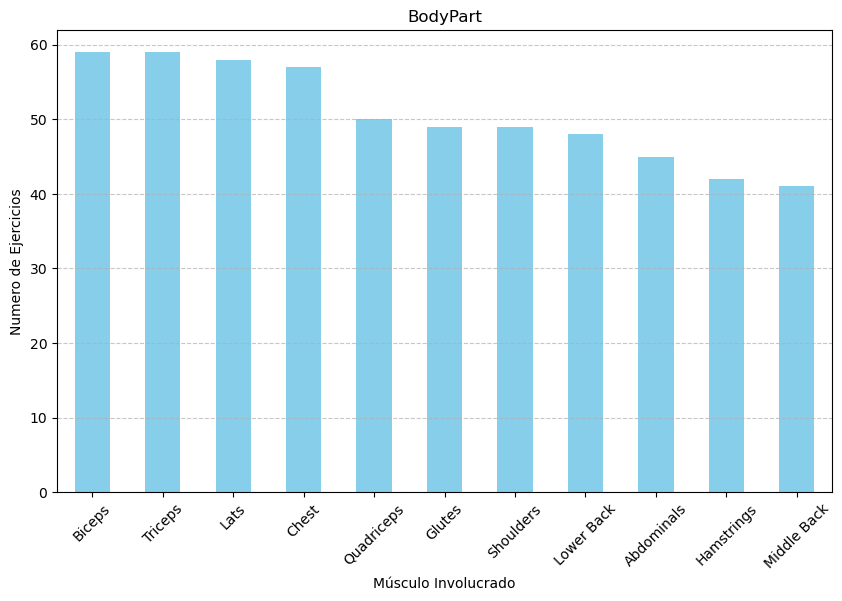

In [26]:
conteo_tipo = df_balanceado['BodyPart'].value_counts()


plt.figure(figsize=(10, 6))  
conteo_tipo.plot(kind='bar', color='skyblue') 
plt.title('BodyPart')  
plt.xlabel('Músculo Involucrado') 
plt.ylabel('Numero de Ejercicios') 
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 

In [27]:
for n in df_balanceado.columns:
    porcentaje = df_gym[n].isna().sum()*100/len(df_gym[n])
    porcentaje = int(round(porcentaje))
    print (f"El porcentaje de valores NaN en la columna {n} es de {porcentaje} %")

El porcentaje de valores NaN en la columna Title es de 0 %
El porcentaje de valores NaN en la columna Desc es de 0 %
El porcentaje de valores NaN en la columna BodyPart es de 0 %


In [28]:
#df_balanceado.to_csv('../dataset/megaGymDataset_balanceado.csv' , index=False)

**Una vez que hemos limpiado el dataset  y eliminado las muestras *'No_desc'* procedemos a entrenar nuestro modelo de regresión**